<a href="https://colab.research.google.com/github/Manohar1805/LIVER_PATIENT_CLASSFICATION/blob/main/final_model_submitted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Domain Analysis

## Attribute information:

● **Age of the patient**

 ● **Gender of the patient**


● **Total Bilirubin**  - normal range should be in between 1.71 to 20.5 µmol/L  as per the article (https://www.mountsinai.org/health-library/tests/bilirubin-blood-test)


● **Direct Bilirubin** - direct bilirubin range should be less than 5.1 µmol/L for a normal person as per (https://www.mountsinai.org/health-library/tests/bilirubin-blood-test)

● **Alkaline Phosphotase**--The normal range is 44 to 147 international units per liter (IU/L) or 0.73 to 2.45 microkatal per liter (µkat/L). as per (https://www.mountsinai.org/health-library/tests/alp-blood-test)


● **Alamine Aminotransferase**- the normal range is 4 to 36 U/L.(https://www.mountsinai.org/health-library/tests/alanine-transaminase-alt-blood-test)

● **Aspartate Aminotransferase** -- The normal range is 8 to 33 U/L.(https://www.mountsinai.org/health-library/tests/aspartate-aminotransferase-ast-blood-test)

●**Total_ProtiensThe normal**-- range is 6.0 to 8.3 grams per deciliter (g/dL) or 60 to 83 g/L(https://www.mountsinai.org/health-library/tests/total-protein)

● **Albumin** - A normal albumin range is 3.4 to 5.4 g/dL. (https://www.urmc.rochester.edu/encyclopedia/content.aspx?contenttypeid=167&contentid=albumin_blood)

● **Albumin and Globulin Ratio** -The normal range for albumin/globulin ratio is over 1Trusted Source, usually around 1 to 2. That’s because there’s a bit more albumin than globulin in serum protein.(https://www.healthline.com/health/a-g-ratio-high#results)

● **Target**: field used to split the data into two sets (1 : patient with liver disease and 2: patient
with no liver disease disease)

## Importing the basic libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,classification_report,roc_curve,RocCurveDisplay,auc,roc_auc_score


from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')

In [ ]:
sns.set_style('whitegrid')

In [ ]:
sns.set_palette('RdYlBu_r')

In [ ]:
# !wget https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1007-LiverPatientPred.zip

In [ ]:
# import zipfile
# zip_ref=zipfile.ZipFile('/content/PRCP-1007-LiverPatientPred.zip') #colab path
# zip_ref.extractall()
# zip_ref.close()

In [ ]:
headings=['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','Target']
data=pd.read_csv("Indian Liver Patient Dataset (ILPD).csv",names=headings)

## Basic checks

In [ ]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Target'],
      dtype='object')

In [ ]:
data.shape

(583, 11)

In [ ]:
data.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Target                          int64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


# Numerical summary

In [ ]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


# categorical summary

In [ ]:
data.describe(include='O')

,Gender
count,583
unique,2
top,Male
freq,441


# Null value count

In [ ]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

# Target classes and count

In [ ]:
data.Target.unique()

array([1, 2], dtype=int64)

In [ ]:
data.Target.value_counts()

1    416
2    167
Name: Target, dtype: int64

## Removing the duplicates

In [ ]:
duplicates=data[data.duplicated()]
len(duplicates)

13

In [ ]:
print('No of duplicate values:', duplicates.shape[0], '\nsize of data:', data.shape)

No of duplicate values: 13 
size of data: (583, 11)


In [ ]:
data=data.drop_duplicates()
data.shape

(570, 11)

## Categorical and numerical columns segregation

In [ ]:
cat_cols=[] # empty list for categorical columns
num_cols=[] # empty list for numerical columns

for i in data.columns:
    if data[i].dtype=='object': # condition to check whether it is object or any other datatype
        cat_cols.append(i)
    else:
        num_cols.append(i)
print('catgorical columns are:- \n', cat_cols, end=' ')
print('\n')
print('numerical columns are:- \n', num_cols, end=' ')

catgorical columns are:- 
 ['Gender'] 

numerical columns are:- 
 ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Target'] 

In [ ]:
num_data=data[num_cols] # defined numerical dataframe using numerical columns
cat_data=data[cat_cols] # defined categorical dataframe using catgorical columns

In [ ]:
num_data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
cat_data.head()

,Gender
0,Female
1,Male
2,Male
3,Male
4,Male


In [ ]:
data.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
data.Gender.value_counts()

Male      430
Female    140
Name: Gender, dtype: int64

## Exploratory data analysis

### Univariate analysis for numerical data

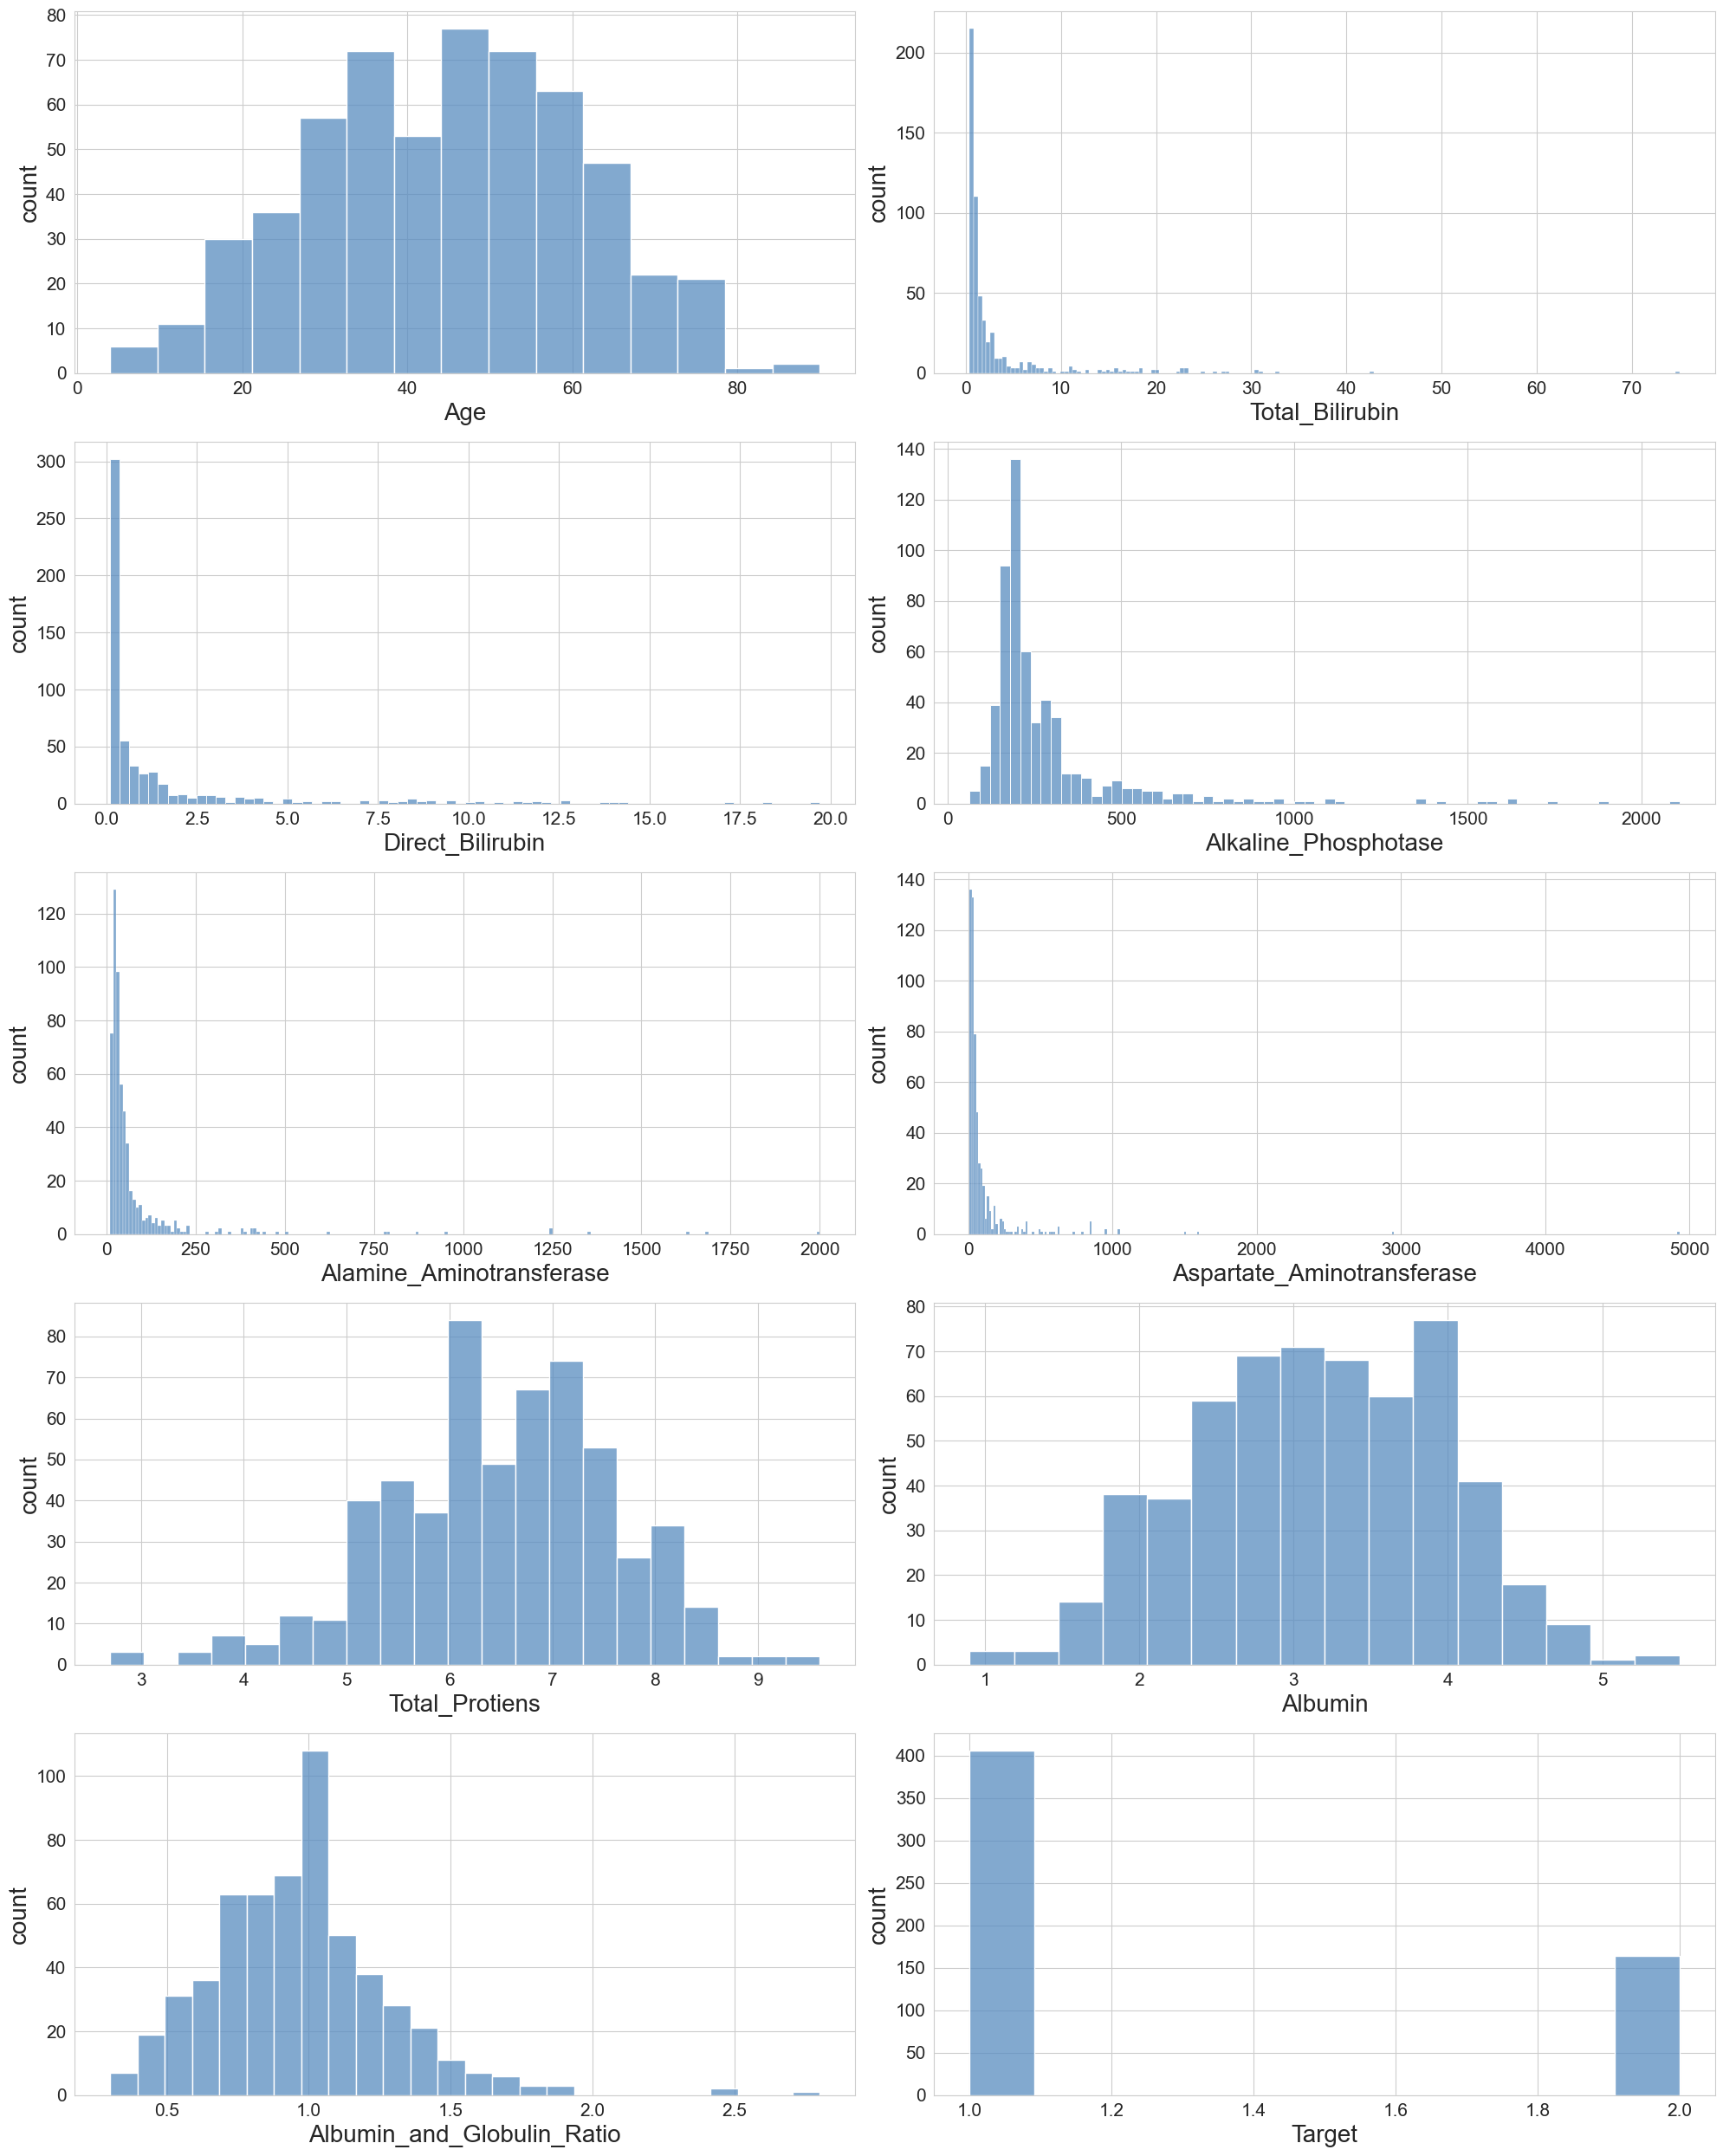

In [ ]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for i in num_data:

    plt.subplot(5,2,plotnumber)
    sns.histplot(x=i, data=data)
    plt.xlabel(i,fontsize=20)
    plt.ylabel('count',fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plotnumber+=1

plt.tight_layout()

●`data['Age']` -- the age column is normally distributed so the maximum data is taken for the age between 30-60


●`data['Total_Bilirubin]`,`data['Direct_Bilirubin']`,`data['Alkaline_Phosphotase']`,
`data['Alamine_Aminotransferase']``data['Aspartate_Aminotransferase']`- most of the values are in the range of normal person health condtion few entries are having values over the range of healthy person


●`data['Total_Protiens']`--- most of the people having protein count between 5-8 which is normal

●`data['Albumin']` & `data['AAlbumin_and_Globulin_Ratio']` also having most entries in the normal range

### Univariate analysis for categorical data

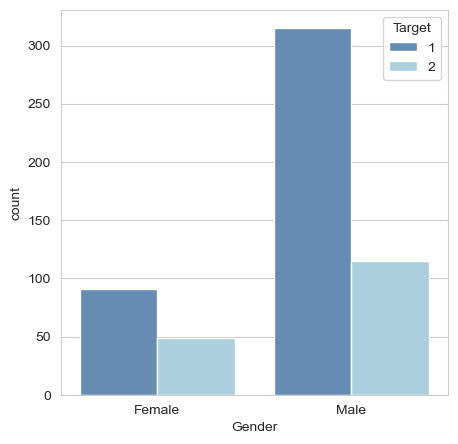

In [ ]:
plt.figure(figsize=(5,5), facecolor='white')
sns.countplot(x='Gender', hue='Target', data=data)
plt.show()

●   most of the liver daigonisis patients are male and male are prone to liver disease

In [ ]:
#import sweetviz as sv # univariate
#my_report=sv.analyze(data)
#my_report.show_html()

### Bivariate analysis

<Figure size 500x500 with 0 Axes>

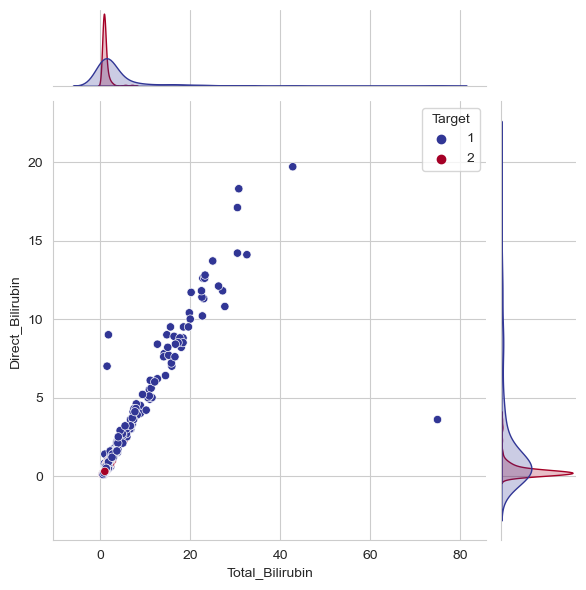

In [ ]:
plt.figure(figsize=(5,5))
sns.jointplot(x='Total_Bilirubin',y='Direct_Bilirubin',hue='Target',palette='RdYlBu_r',data=data)
plt.show()

<Figure size 500x500 with 0 Axes>

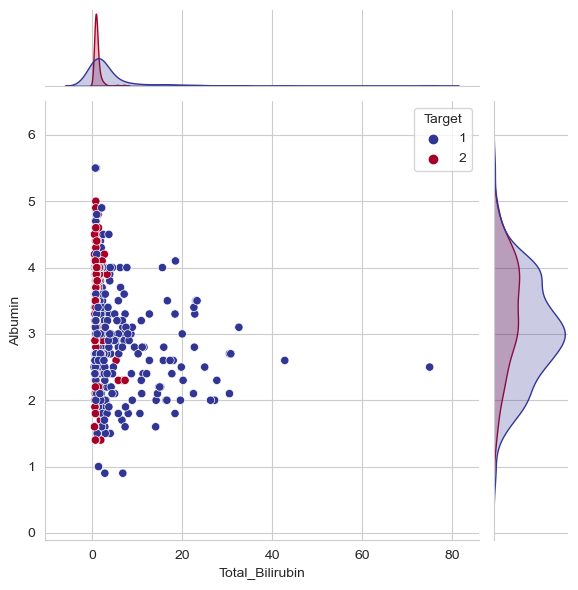

In [ ]:
plt.figure(figsize=(5,5),facecolor='white')
sns.jointplot(x='Total_Bilirubin',y='Albumin',palette='RdYlBu_r',hue='Target',data=data)
plt.show()

<Figure size 500x500 with 0 Axes>

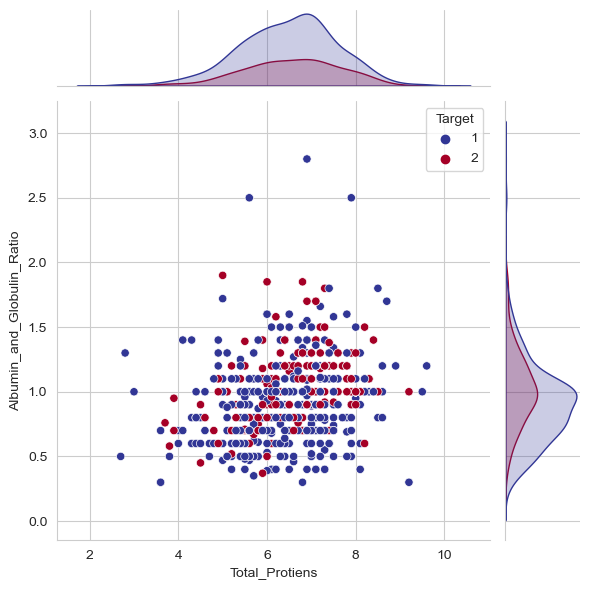

In [ ]:
plt.figure(figsize=(5,5),facecolor='white')
sns.jointplot(x='Total_Protiens',y='Albumin_and_Globulin_Ratio',palette='RdYlBu_r',hue='Target',data=data)
plt.show()

●  we can clearly see that there is no direct relation between the independant features

### Multivariate analysis

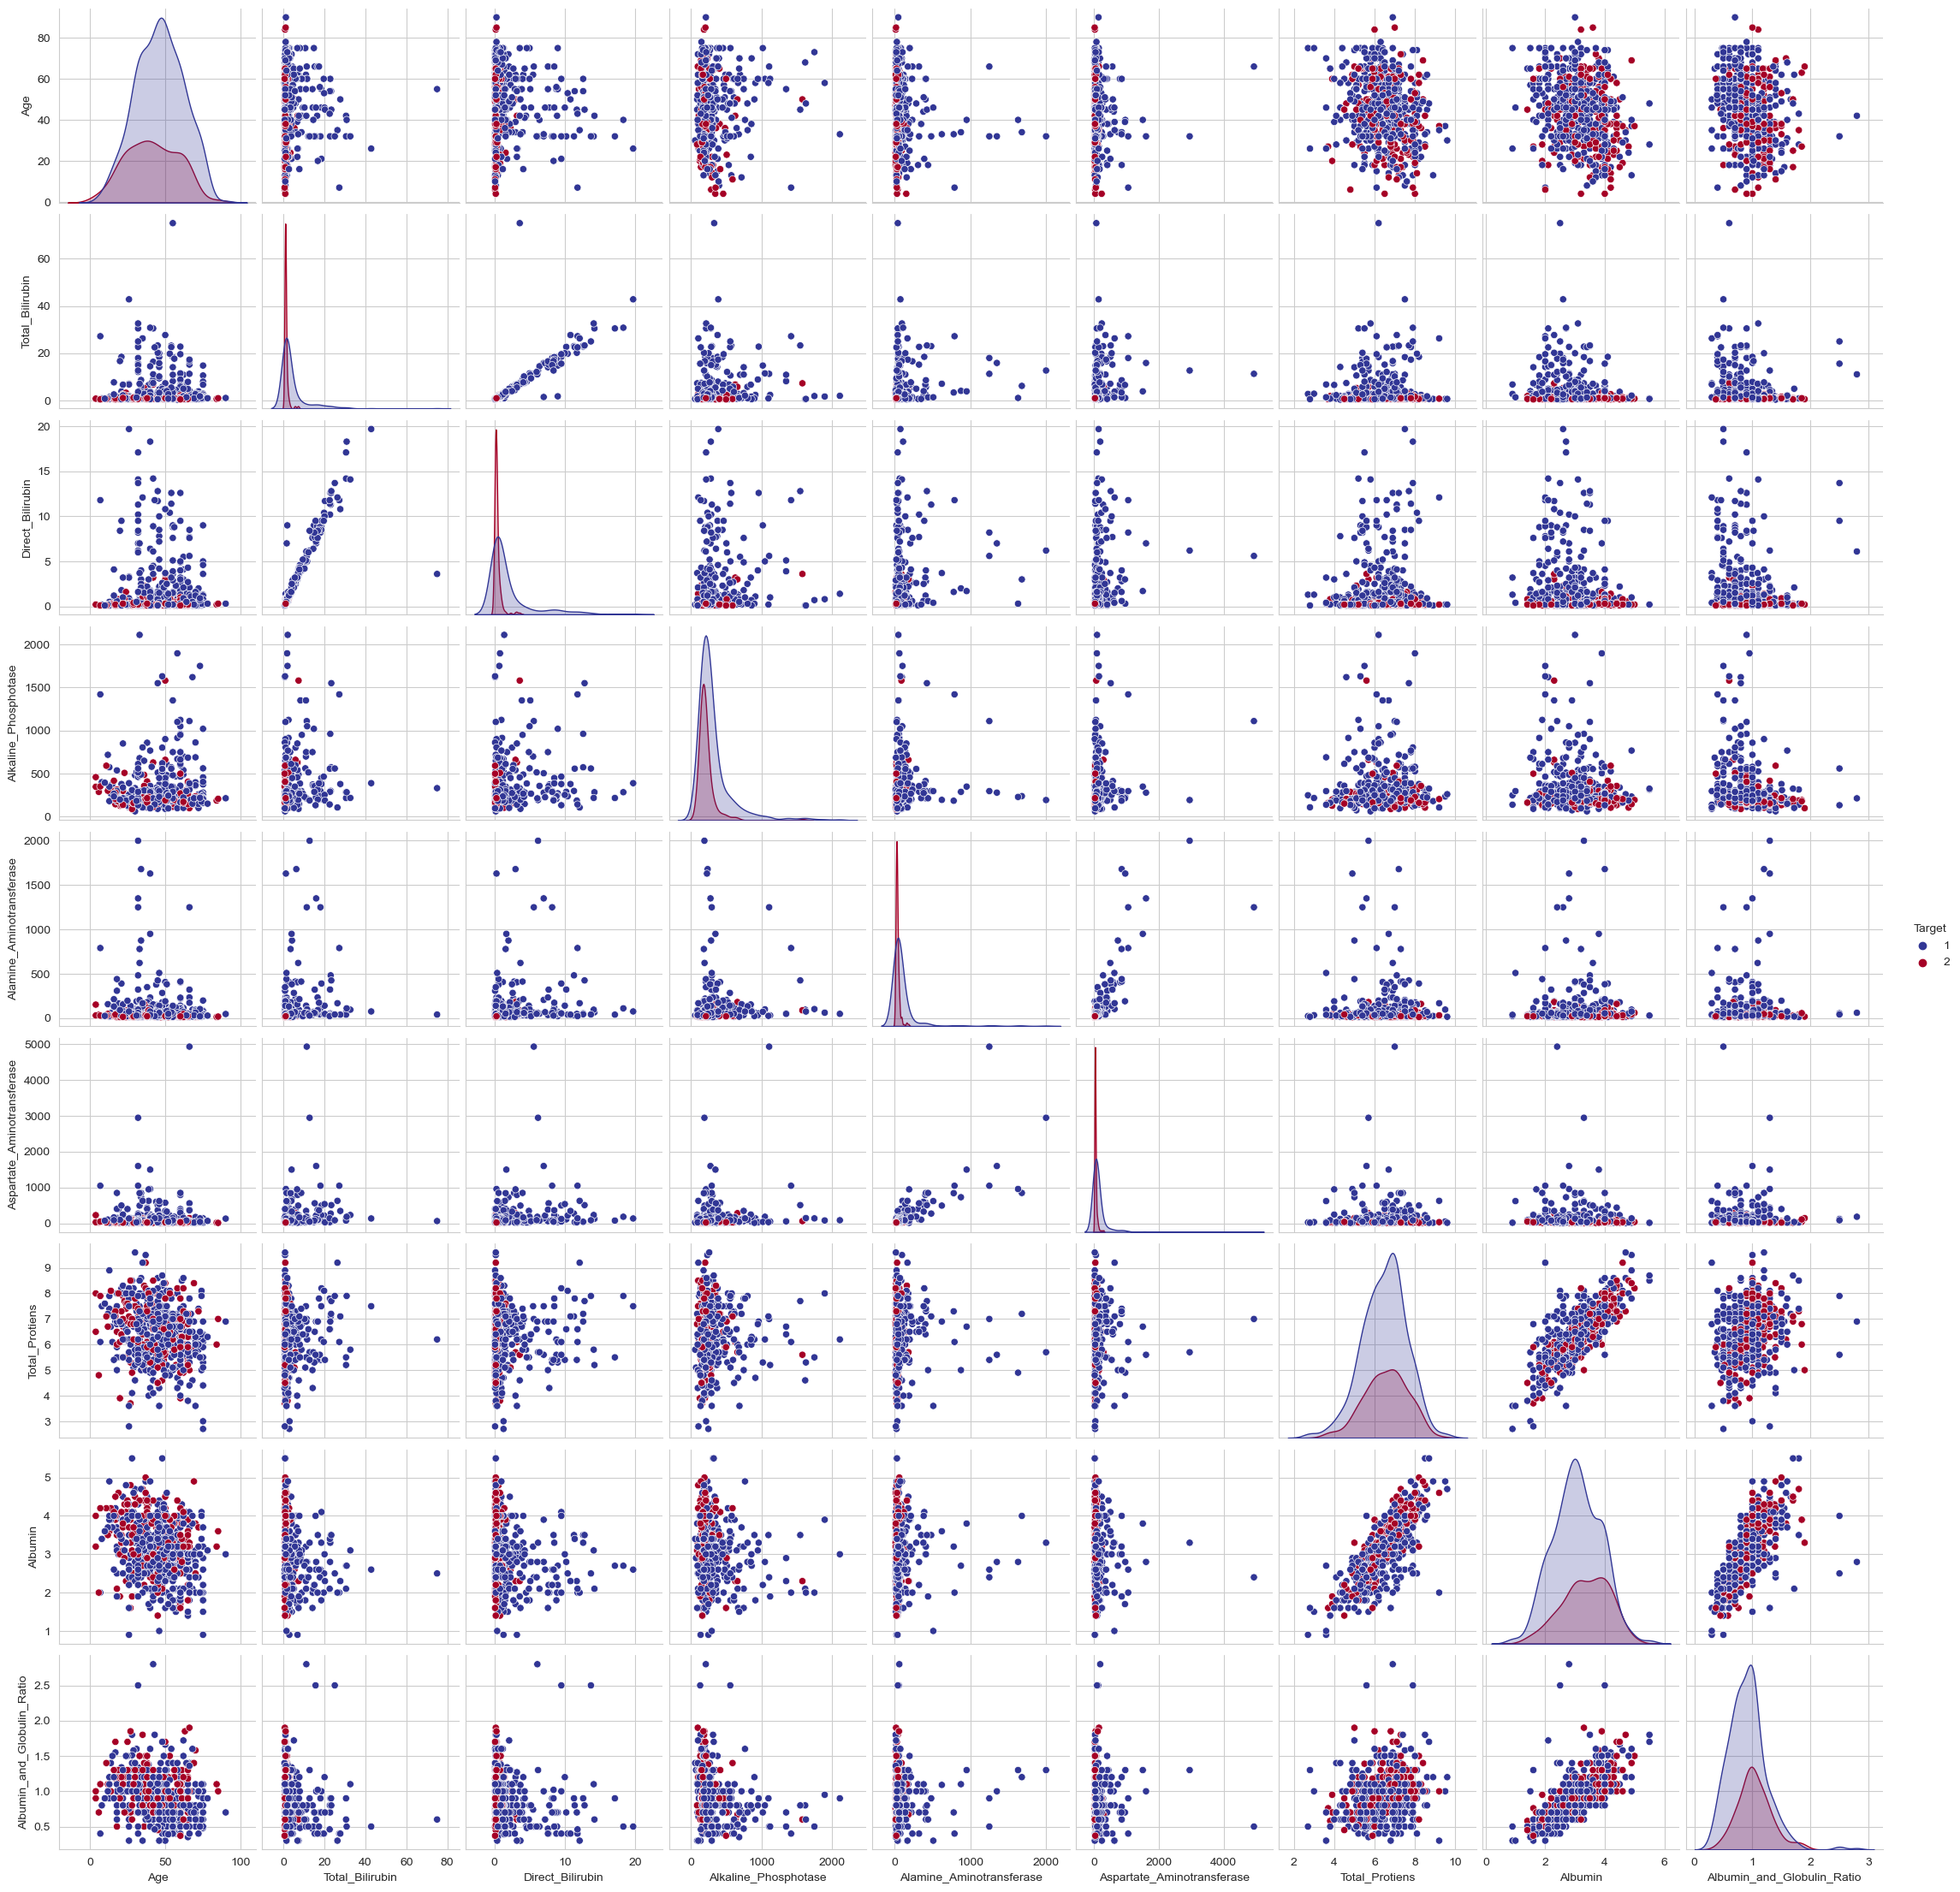

In [ ]:
sns.pairplot(data,hue='Target',palette='RdYlBu_r')



*   with the increment of `albumin`  the `albumin_glucose_ratio` is increasing
*   and also with it has direct corelation with total protien of the body
*   the `total bilirubin` and `direct bilirubin` is directly corelated




## Data preprocessing

In [ ]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

## Handling missing values

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Target                        0
dtype: int64

In [ ]:
data.shape

(566, 11)

## Converting categorical data in to numerical data

## One hot encoder

In [ ]:
data.Gender.value_counts()

Male      428
Female    138
Name: Gender, dtype: int64

In [ ]:
data['Gender']=pd.get_dummies(data['Gender'],drop_first=True)

In [ ]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
data.Gender.value_counts()

1    428
0    138
Name: Gender, dtype: int64

## Check for outliers

In [ ]:
num_data.columns[:-1]

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio'],
      dtype='object')

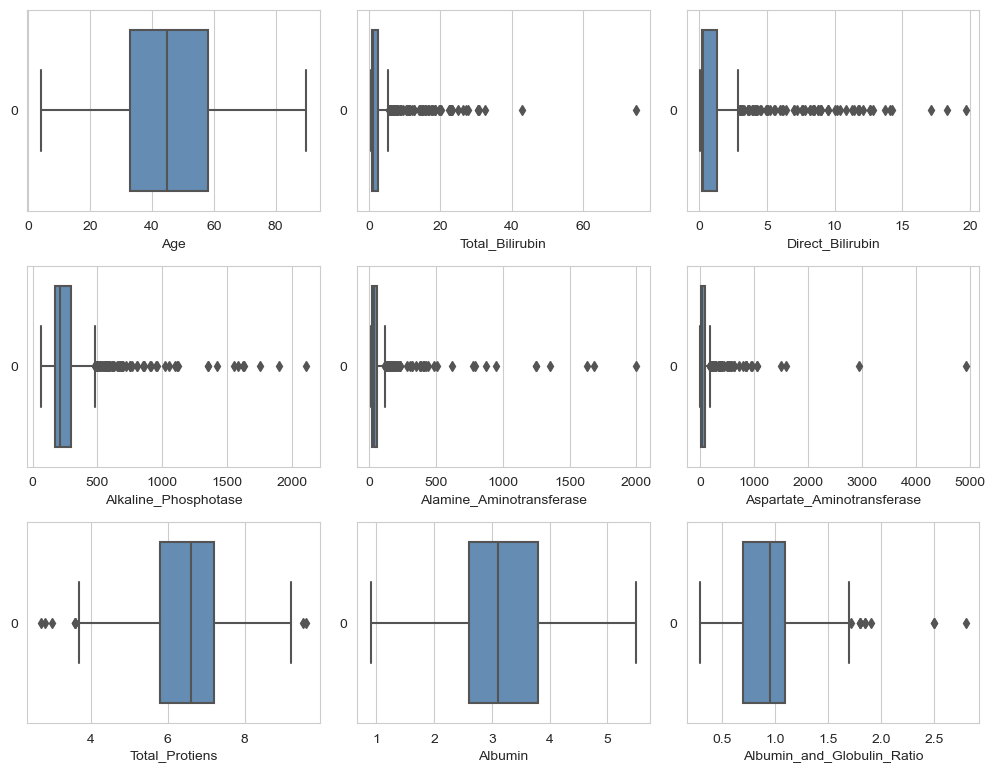

In [ ]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1

for column in num_data.columns[:-1]:

    plt.subplot(4,3,plotnumber)
    sns.boxplot(data[column],orient='h')
#     data[column].iplot(kind='box')
    plt.xlabel(column,fontsize=10)
    plt.xticks(fontsize=10)
    plotnumber+=1

plt.tight_layout()



*   as you can in the columns mentioned in the `cols` list are having most of the data outside the box plot , so applying the log transformation to avaoid data loss



In [ ]:
cols=['Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase']

In [ ]:
data.shape

(566, 11)

#log transformation

In [ ]:
for i in cols:
    data[i]=np.log(data[i])

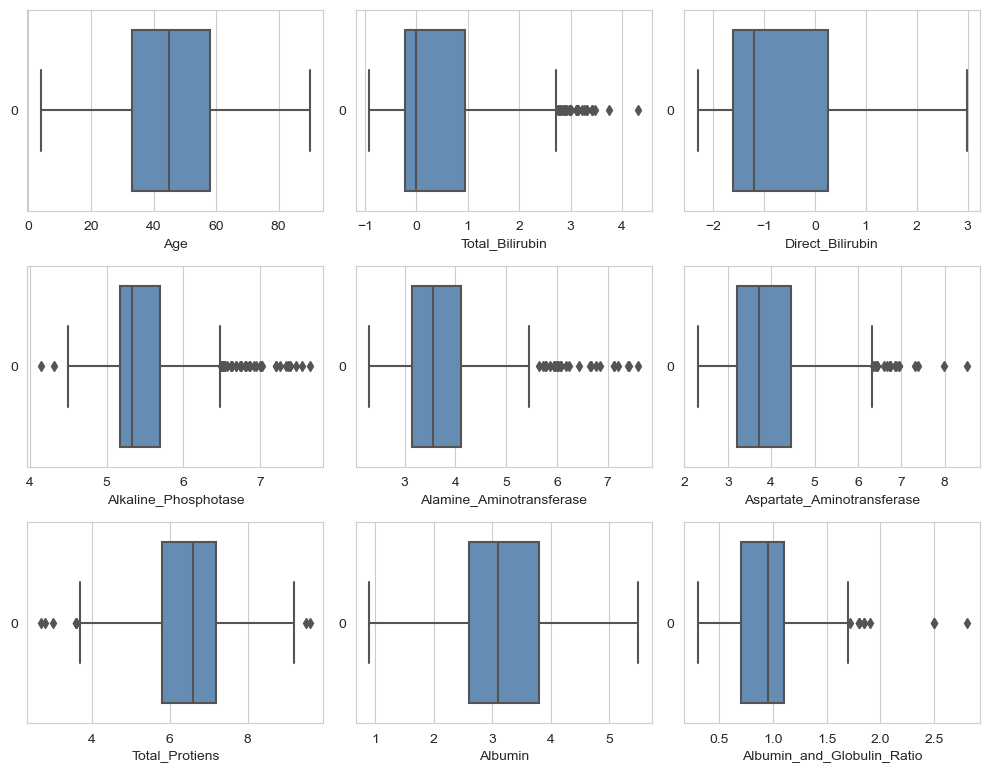

In [ ]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1

for column in num_data.columns[:-1]:

    plt.subplot(4,3,plotnumber)
    sns.boxplot(data[column],orient='h')
#     data[column].iplot(kind='box')
    plt.xlabel(column,fontsize=10)
    plt.xticks(fontsize=10)
    plotnumber+=1

plt.tight_layout()



*   After applying log transformation the values came to better range but still have some values out of the box so going to impute those values with median of that column




#median imputation

In [ ]:
len(data.loc[data['Total_Bilirubin']>2.9])

24

In [ ]:
data.loc[data['Total_Bilirubin']>2.9,'Total_Bilirubin']=np.median(data['Total_Bilirubin'])

In [ ]:
len(data.loc[data['Alkaline_Phosphotase']>6.5])

34

In [ ]:
data.loc[data['Alkaline_Phosphotase']>6.5,'Alkaline_Phosphotase']=np.median(data['Alkaline_Phosphotase'])

In [ ]:
len(data.loc[data['Alamine_Aminotransferase']>5.5])

27

In [ ]:
data.loc[data['Alamine_Aminotransferase']>5.5,'Alamine_Aminotransferase']=np.median(data['Alamine_Aminotransferase'])

In [ ]:
len(data.loc[data['Aspartate_Aminotransferase']>6.5])

15

In [ ]:
data.loc[data['Aspartate_Aminotransferase']>6.5,'Aspartate_Aminotransferase']=np.median(data['Aspartate_Aminotransferase'])

In [ ]:
len(data.loc[data['Albumin_and_Globulin_Ratio']>1.7])

10

In [ ]:
data.loc[data['Albumin_and_Globulin_Ratio']>1.7,'Albumin_and_Globulin_Ratio']=np.median(data['Albumin_and_Globulin_Ratio'])

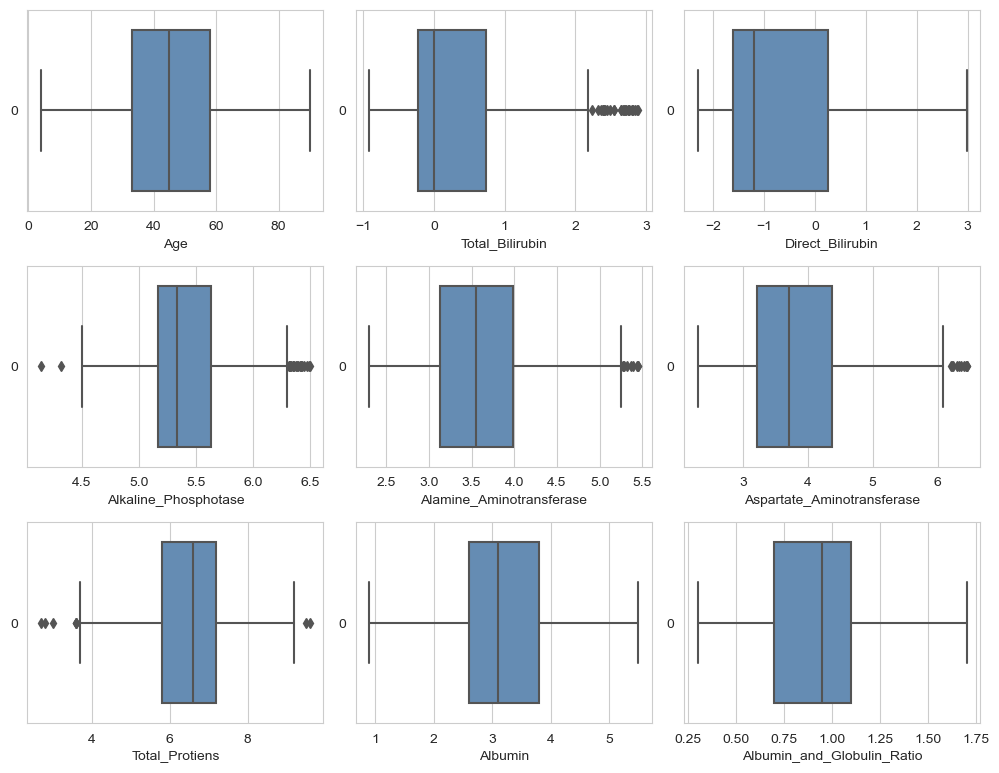

In [ ]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1

for column in num_data.columns[:-1]:

    plt.subplot(4,3,plotnumber)
    sns.boxplot(data[column],orient='h')
#     data[column].iplot(kind='box')
    plt.xlabel(column,fontsize=10)
    plt.xticks(fontsize=10)
    plotnumber+=1

plt.tight_layout()

In [ ]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,0,-0.356675,-2.302585,5.231109,2.772589,2.890372,6.8,3.3,0.90,1
1,62,1,2.388763,1.704748,5.337538,4.158883,4.605170,7.5,3.2,0.74,1
2,62,1,1.987874,1.410987,6.194405,4.094345,4.219508,7.0,3.3,0.89,1
3,58,1,0.000000,-0.916291,5.204007,2.639057,2.995732,6.8,3.4,1.00,1
4,72,1,1.360977,0.693147,5.273000,3.295837,4.077537,7.3,2.4,0.40,1


# feature selection

<AxesSubplot:>

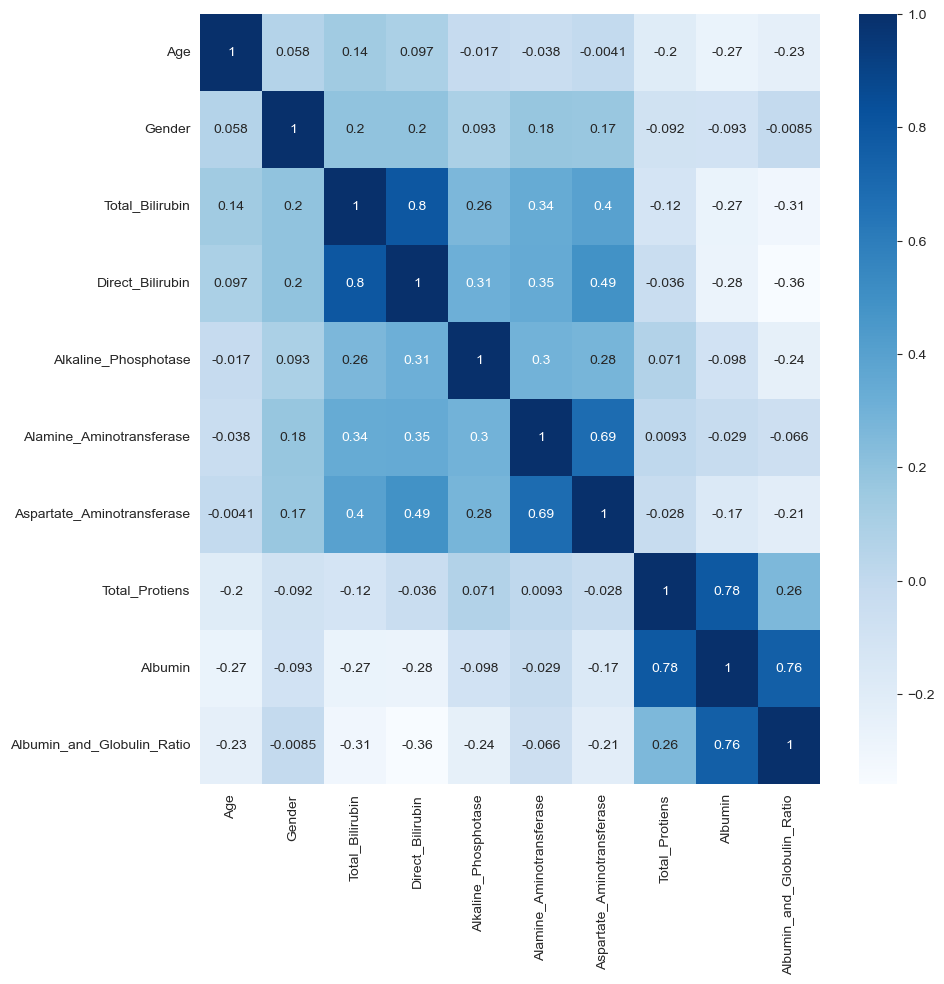

In [ ]:
plt.figure(figsize=(10, 10), facecolor='white')
sns.heatmap(data.iloc[:,:-1].corr(), annot=True,cmap='Blues')



*   No corelation value going beyond 0.9 so keeping all the columns



In [ ]:
data.iloc[:,:-1].corrwith(data['Target']).sort_values()

Direct_Bilirubin             -0.325756
Total_Bilirubin              -0.287960
Aspartate_Aminotransferase   -0.287600
Alamine_Aminotransferase     -0.257252
Alkaline_Phosphotase         -0.184558
Age                          -0.133821
Gender                       -0.077396
Total_Protiens                0.036443
Albumin                       0.165273
Albumin_and_Globulin_Ratio    0.190167
dtype: float64

In [ ]:
data['Target']=data['Target'].map({2:0,1:1})

In [ ]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,0,-0.356675,-2.302585,5.231109,2.772589,2.890372,6.8,3.3,0.90,1
1,62,1,2.388763,1.704748,5.337538,4.158883,4.605170,7.5,3.2,0.74,1
2,62,1,1.987874,1.410987,6.194405,4.094345,4.219508,7.0,3.3,0.89,1
3,58,1,0.000000,-0.916291,5.204007,2.639057,2.995732,6.8,3.4,1.00,1
4,72,1,1.360977,0.693147,5.273000,3.295837,4.077537,7.3,2.4,0.40,1


In [ ]:
X=data.iloc[:,:-1]
X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,-0.356675,-2.302585,5.231109,2.772589,2.890372,6.8,3.3,0.90
1,62,1,2.388763,1.704748,5.337538,4.158883,4.605170,7.5,3.2,0.74
2,62,1,1.987874,1.410987,6.194405,4.094345,4.219508,7.0,3.3,0.89
3,58,1,0.000000,-0.916291,5.204007,2.639057,2.995732,6.8,3.4,1.00
4,72,1,1.360977,0.693147,5.273000,3.295837,4.077537,7.3,2.4,0.40


In [ ]:
y=data.Target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Target, dtype: int64

In [ ]:
y.value_counts()

1    404
0    162
Name: Target, dtype: int64

# balncing of data

In [ ]:
# Apply smote
from imblearn.over_sampling import SMOTE,SVMSMOTE,ADASYN
smote=SMOTE()

In [ ]:
X_smote, y_smote=smote.fit_resample(X, y)

In [ ]:
from collections import Counter
print("actual classes",Counter(y))
print("smote classes",Counter(y_smote))

actual classes Counter({1: 404, 0: 162})
smote classes Counter({1: 404, 0: 404})


# train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(646, 10)
(162, 10)
(646,)
(162,)


## Scaling of data

In [ ]:
from sklearn.preprocessing import MinMaxScaler ,StandardScaler
scaler=MinMaxScaler()

In [ ]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
y_smote.value_counts()

1    404
0    404
Name: Target, dtype: int64

In [ ]:
len(X_train_scaled),len(y_train)

(646, 646)

# Required functions for ROC MODEL

In [ ]:
# def kf_cross_cv(model,X,y):
#     '''this will prints the accuracies
#         for given given model by k-fold cv method'''
#     k=5
#     score=cross_val_score(model,X,y,cv=k)
#     print(f'the accuracies of kfold are :\n {score}')


# def stratified_cv(model,X,y):
#     '''this will prints the accuracies
#         for given given model by stratified cv method'''
#     n_splits=5
#     random_state=None
#     skf=StratifiedKFold(n_splits=n_splits,random_state=random_state)

#     accuracy=[]
#     for train_index, test_index in skf.split(X,y):
#         X1_train,X1_test=X.iloc[train_index],X.iloc[test_index]
#         y1_train,y1_test=y.iloc[train_index],y.iloc[test_index]

#         model.fit(X1_train,y1_train)
#         prediction=model.predict(X1_test)
#         score=accuracy_score(prediction,y1_test)
#         accuracy.append(score)
#     print(f'stratified mean accuracy are :\n {accuracy}')


def predict_best_threshold(model):
    """ Gives the balanced thrshold value
    using fpr,tpr,threshold values"""

    log_proba=model.predict_proba(X_test)

    fpr,tpr,threshold=roc_curve(y_test,log_proba[:,-1])

    gmeans=np.sqrt(tpr*(1-fpr))

    ix = np.argmax(gmeans)

    print('Best Threshold=%f, G-Mean=%.3f' % (threshold[ix], gmeans[ix]))



def roc_plot(model):
    """
    plots the roc curve using plot function
    """
    log=model.predict_proba(X_test)
    fpr,tpr,threshold=roc_curve(y_test,log[:,-1])
    auc_score=auc(fpr,tpr)
    RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=auc_score).plot()


def class_segregation(model):
    """
    this function will segregate the probabilities
    into classes based on given threshold value
    """
    log=model.predict_proba(X_test)

    res=[]
    threshold=float(input('enter the best thrshold value: '))
    for i in log:
        if i[1]>threshold:

            res.append(1)
        else:
            res.append(0)
    return res

def predition_roc(model):

    """
    This uses predict_best_threshold

    and class segregation to predict and

    create the confusion matrix
    """

    predict_best_threshold(model)

    final_pred=class_segregation(model)

    print("metrics on test data \n")

    print("confusion matrix: \n", confusion_matrix(y_test,final_pred))
    print("classification report: \n", classification_report(y_test,final_pred))


def cross_val_scores(model,x,y):
    """
    This will print the cross val scores
    of kfold and startified cv
    """

    print(kf_cross_cv(model,x,y))
    print('\n')
    print(stratified_cv(model,x,y))

def all_work(model,x,y):
    """
    This uses all previlosly created
    functions inorder and gives the overall results

    """

    cross_val_scores(model,x,y)

    print('====='*10)

    predition_roc(model)

    print('====='*10)

    roc_plot(model)



## Build Model

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()

## Roc model

the accuracies of kfold are :
 [0.69298246 0.76106195 0.7079646  0.7079646  0.72566372]
None


stratified mean accuracy are :
 [0.6929824561403509, 0.7610619469026548, 0.7079646017699115, 0.7079646017699115, 0.7256637168141593]
None
Best Threshold=0.714237, G-Mean=0.737
enter the best thrshold value: 0.7142337
metrics on test data 

confusion matrix: 
 [[67 19]
 [23 53]]
classification report: 
               precision    recall  f1-score   support

           0       0.74      0.78      0.76        86
           1       0.74      0.70      0.72        76

    accuracy                           0.74       162
   macro avg       0.74      0.74      0.74       162
weighted avg       0.74      0.74      0.74       162



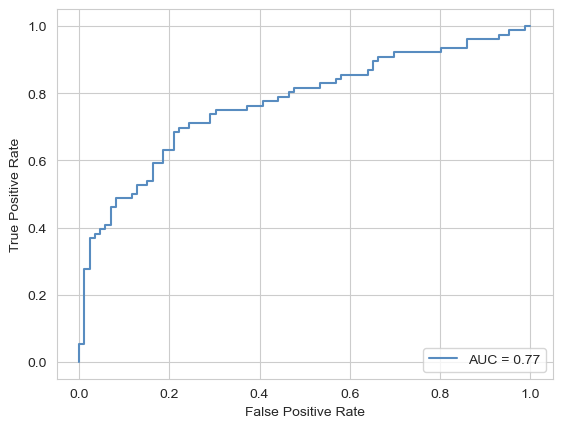

In [ ]:
all_work(log_model,X,y)

## Normal model

In [ ]:
log_model1=LogisticRegression()

In [ ]:
log_model1.fit(X_train, y_train)

log_pred1=log_model.predict(X_test)

print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_test,log_pred1))
print("classification report: \n", classification_report(y_test,log_pred1))



metrics on test data 

confusion matrix: 
 [[65 21]
 [25 51]]
classification report: 
               precision    recall  f1-score   support

           0       0.72      0.76      0.74        86
           1       0.71      0.67      0.69        76

    accuracy                           0.72       162
   macro avg       0.72      0.71      0.71       162
weighted avg       0.72      0.72      0.72       162



## optimized model

In [ ]:
# parameters={
#             'penalty':['l1', 'l2', 'elasticnet'],

#              'C'       : np.logspace(-3,3,7),

#             'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

# }



In [ ]:
# gcv=GridSearchCV(log_model,param_grid=parameters,scoring = 'accuracy',cv = 5,n_jobs=-1)

In [ ]:
# gcv.fit(X_train,y_train)

In [ ]:
# gcv.best_estimator_

In [ ]:
log_model2=LogisticRegression(C=1000.0)

In [ ]:
log_model2.fit(X_train,y_train)

LogisticRegression(C=1000.0)

In [ ]:
log_pred2=log_model2.predict(X_test)

In [ ]:
#metrics on test data
print("metrics on test data \n")
print("confusion matrix: \n", confusion_matrix(y_test,log_pred2))
print("classification report: \n", classification_report(y_test,log_pred2))

metrics on test data 

confusion matrix: 
 [[65 21]
 [26 50]]
classification report: 
               precision    recall  f1-score   support

           0       0.71      0.76      0.73        86
           1       0.70      0.66      0.68        76

    accuracy                           0.71       162
   macro avg       0.71      0.71      0.71       162
weighted avg       0.71      0.71      0.71       162



### KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()


the accuracies of kfold are :
 [0.69298246 0.69911504 0.7079646  0.61946903 0.79646018]
None


stratified mean accuracy are :
 [0.6929824561403509, 0.6991150442477876, 0.7079646017699115, 0.6194690265486725, 0.7964601769911505]
None
Best Threshold=0.800000, G-Mean=0.823
enter the best thrshold value: 0.80
metrics on test data 

confusion matrix: 
 [[86  0]
 [41 35]]
classification report: 
               precision    recall  f1-score   support

           0       0.68      1.00      0.81        86
           1       1.00      0.46      0.63        76

    accuracy                           0.75       162
   macro avg       0.84      0.73      0.72       162
weighted avg       0.83      0.75      0.72       162



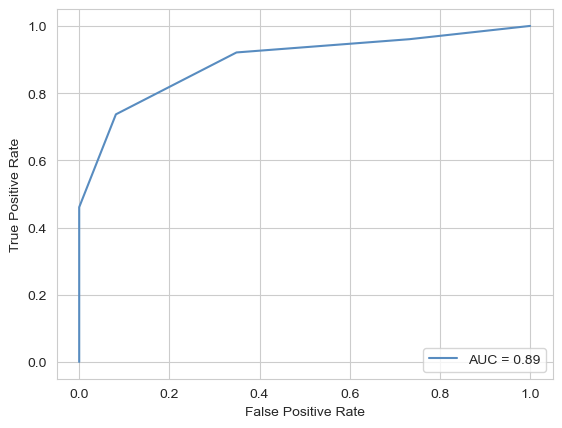

In [ ]:
all_work(knn_model,X,y)

## Normal model

In [ ]:
error_rate=[]
for i in range(1, 20):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    error_rate.append(np.mean(y_pred!=y_test))

Text(0, 0.5, 'error_rate')

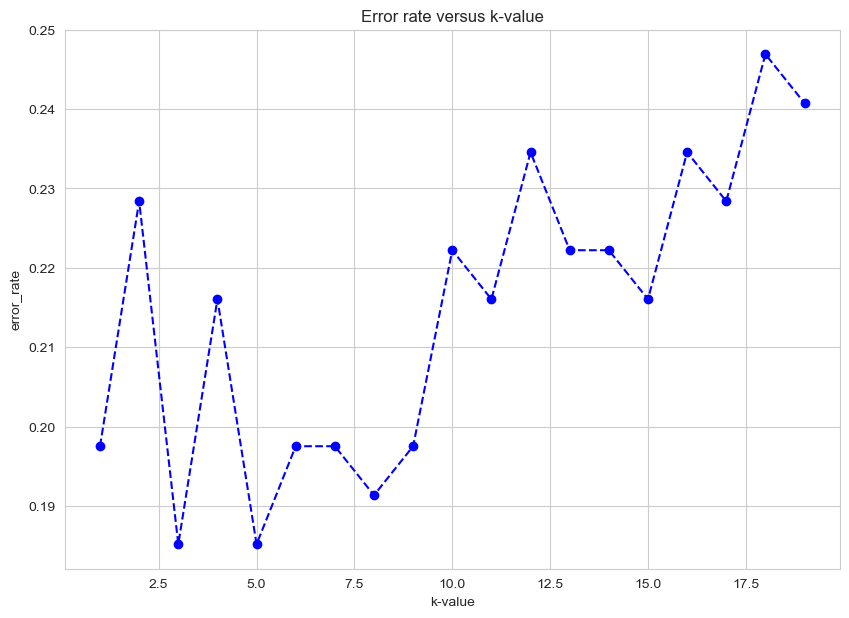

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, 20), error_rate, color='blue', linestyle='--', marker='o', markersize=6)
plt.title("Error rate versus k-value")
plt.xlabel('k-value')
plt.ylabel('error_rate')

In [ ]:
knn_model1=KNeighborsClassifier(n_neighbors=5)
knn_model1.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_pred1=knn_model1.predict(X_test)

In [ ]:


#metrics on test data
print("metrics on test data \n")
print("confusion matrix: \n", confusion_matrix(y_test,knn_pred1))
print("classification report: \n", classification_report(y_test,knn_pred1))


metrics on test data 

confusion matrix: 
 [[79  7]
 [23 53]]
classification report: 
               precision    recall  f1-score   support

           0       0.77      0.92      0.84        86
           1       0.88      0.70      0.78        76

    accuracy                           0.81       162
   macro avg       0.83      0.81      0.81       162
weighted avg       0.83      0.81      0.81       162



### SVM Classifier

In [ ]:
from sklearn.svm import SVC
svc_model=SVC(probability=True)

## roc model

the accuracies of kfold are :
 [0.71052632 0.71681416 0.71681416 0.71681416 0.7079646 ]
None


stratified mean accuracy are :
 [0.7105263157894737, 0.7168141592920354, 0.7168141592920354, 0.7168141592920354, 0.7079646017699115]
None
Best Threshold=0.712415, G-Mean=0.396
enter the best thrshold value: 0.712415
metrics on test data 

confusion matrix: 
 [[38 48]
 [50 26]]
classification report: 
               precision    recall  f1-score   support

           0       0.43      0.44      0.44        86
           1       0.35      0.34      0.35        76

    accuracy                           0.40       162
   macro avg       0.39      0.39      0.39       162
weighted avg       0.39      0.40      0.39       162



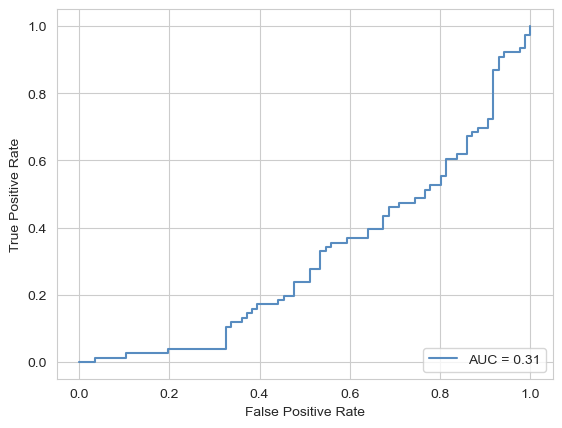

In [ ]:
all_work(svc_model,X,y)

## Normal Model

In [ ]:
svc_model1=SVC()

In [ ]:
svc_model1.fit(X_train,y_train)

SVC()

In [ ]:
svc_pred1=svc_model1.predict(X_test)

In [ ]:

#metrics on test data
print("metrics on test data \n")
print("confusion matrix: \n", confusion_matrix(y_test,svc_pred1))
print("classification report: \n", classification_report(y_test,svc_pred1))

metrics on test data 

confusion matrix: 
 [[55 31]
 [22 54]]
classification report: 
               precision    recall  f1-score   support

           0       0.71      0.64      0.67        86
           1       0.64      0.71      0.67        76

    accuracy                           0.67       162
   macro avg       0.67      0.68      0.67       162
weighted avg       0.68      0.67      0.67       162



## optimized Model

In [ ]:
# params=[{'C':[1,10,100],
#          'kernel':['rbf','linear','poly'],
#          'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
#          }]

In [ ]:
# gcv=RandomizedSearchCV(svc_model,param_distributions=params,scoring = 'accuracy',cv = 5,n_jobs=-1)

In [ ]:
# gcv.fit(X_train,y_train)

In [ ]:
# gcv.best_estimator_

In [ ]:
sv_model2=SVC(C=100, gamma=0.6)
sv_model2.fit(X_train,y_train)
sv_pred2=sv_model2.predict(X_test)

In [ ]:

#metrics on test data
print("metrics on test data \n")
print("confusion matrix: \n", confusion_matrix(y_test,sv_pred2))
print("classification report: \n", classification_report(y_test,sv_pred2))

metrics on test data 

confusion matrix: 
 [[74 12]
 [ 9 67]]
classification report: 
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        86
           1       0.85      0.88      0.86        76

    accuracy                           0.87       162
   macro avg       0.87      0.87      0.87       162
weighted avg       0.87      0.87      0.87       162



# Decission Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model=DecisionTreeClassifier()

## roc model

the accuracies of kfold are :
 [0.66666667 0.6460177  0.61946903 0.56637168 0.71681416]
None


stratified mean accuracy are :
 [0.6666666666666666, 0.6814159292035398, 0.584070796460177, 0.5486725663716814, 0.6991150442477876]
None
Best Threshold=1.000000, G-Mean=0.858
enter the best thrshold value: 1
metrics on test data 

confusion matrix: 
 [[86  0]
 [76  0]]
classification report: 
               precision    recall  f1-score   support

           0       0.53      1.00      0.69        86
           1       0.00      0.00      0.00        76

    accuracy                           0.53       162
   macro avg       0.27      0.50      0.35       162
weighted avg       0.28      0.53      0.37       162



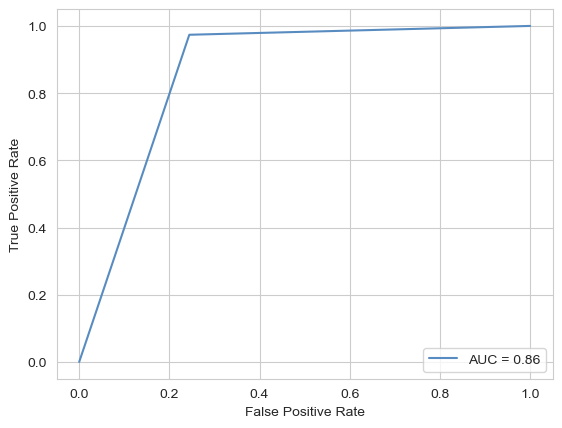

In [ ]:
all_work(dt_model,X,y)

## Normal model

In [ ]:
dt_model1=DecisionTreeClassifier()

In [ ]:
dt_model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
dt_pred1=dt_model1.predict(X_test)

In [ ]:

print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_test,dt_pred1))
print("classification report: \n", classification_report(y_test,dt_pred1))


metrics on test data 

confusion matrix: 
 [[74 12]
 [18 58]]
classification report: 
               precision    recall  f1-score   support

           0       0.80      0.86      0.83        86
           1       0.83      0.76      0.79        76

    accuracy                           0.81       162
   macro avg       0.82      0.81      0.81       162
weighted avg       0.82      0.81      0.81       162



## optimized model

In [ ]:
# parameters={'criterion':['gini', 'entropy', 'log_loss'],
#             "splitter":["best","random"],
#             "max_depth" : [1,3,5,7,9,11,12],
#            "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
#            "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
#            "max_features":["auto","log2","sqrt",None],
#            "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [ ]:
# gcv=GridSearchCV(dt_model,
#                 param_grid=parameters,
#                 cv=5,
#                 n_jobs=-1,
#                 scoring='accuracy')

In [ ]:
# gcv.fit(X_train,y_train)

In [ ]:
# gcv.best_estimator_

In [ ]:
dt_model2=DecisionTreeClassifier(max_depth=12, max_features='sqrt', max_leaf_nodes=50,
                       min_weight_fraction_leaf=0.1)

In [ ]:
dt_model2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=12, max_features='sqrt', max_leaf_nodes=50,
                       min_weight_fraction_leaf=0.1)

In [ ]:
dt_pred2=dt_model2.predict(X_test)

In [ ]:

#metrics on test data
print("metrics on test data \n")
print("confusion matrix: \n", confusion_matrix(y_test,dt_pred2))
print("classification report: \n", classification_report(y_test,dt_pred2))

metrics on test data 

confusion matrix: 
 [[57 29]
 [22 54]]
classification report: 
               precision    recall  f1-score   support

           0       0.72      0.66      0.69        86
           1       0.65      0.71      0.68        76

    accuracy                           0.69       162
   macro avg       0.69      0.69      0.69       162
weighted avg       0.69      0.69      0.69       162



# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model=RandomForestClassifier()

the accuracies of kfold are :
 [0.70175439 0.71681416 0.67256637 0.6460177  0.73451327]
None


stratified mean accuracy are :
 [0.6929824561403509, 0.7433628318584071, 0.6902654867256637, 0.6283185840707964, 0.7433628318584071]
None
Best Threshold=0.700000, G-Mean=0.970
enter the best thrshold value: 0.70
metrics on test data 

confusion matrix: 
 [[81  5]
 [ 1 75]]
classification report: 
               precision    recall  f1-score   support

           0       0.99      0.94      0.96        86
           1       0.94      0.99      0.96        76

    accuracy                           0.96       162
   macro avg       0.96      0.96      0.96       162
weighted avg       0.96      0.96      0.96       162



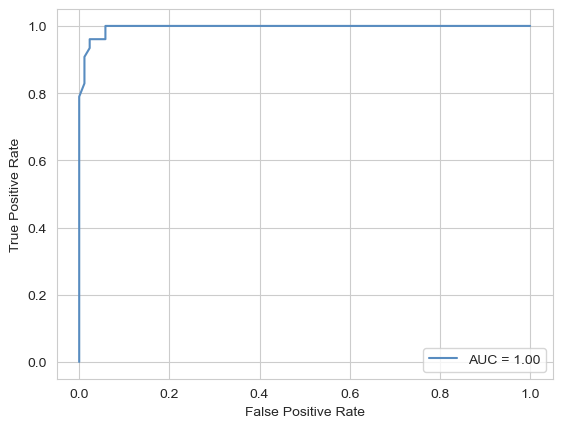

In [ ]:
all_work(rf_model,X,y)

## Normal model

In [ ]:
rf_model1=RandomForestClassifier()

In [ ]:
rf_model1.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
rf_pred1=rf_model1.predict(X_test)

In [ ]:

#metrics on test data
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_test,rf_pred1))
print("classification report: \n", classification_report(y_test,rf_pred1))


metrics on test data 

confusion matrix: 
 [[73 13]
 [19 57]]
classification report: 
               precision    recall  f1-score   support

           0       0.79      0.85      0.82        86
           1       0.81      0.75      0.78        76

    accuracy                           0.80       162
   macro avg       0.80      0.80      0.80       162
weighted avg       0.80      0.80      0.80       162



In [ ]:
# params_1={'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
# gcv=RandomizedSearchCV(RandomForestClassifier(),
#                          param_distributions=params_1,
#                          #cv=5,
#                          n_jobs=-1,
#                        verbose=2
#                          )
# gcv.fit(X_train,y_train)

In [ ]:
# gcv.best_estimator_

In [ ]:
rf_model2=RandomForestClassifier(bootstrap=False, max_depth=80, min_samples_split=5,
                       n_estimators=2000)
rf_model2.fit(X_train,y_train)
rf_pred2=rf_model2.predict(X_test)


print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_test,rf_pred2))
print("classification report: \n", classification_report(y_test,rf_pred2))


metrics on test data 

confusion matrix: 
 [[72 14]
 [17 59]]
classification report: 
               precision    recall  f1-score   support

           0       0.81      0.84      0.82        86
           1       0.81      0.78      0.79        76

    accuracy                           0.81       162
   macro avg       0.81      0.81      0.81       162
weighted avg       0.81      0.81      0.81       162



# Gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_model=GradientBoostingClassifier()

the accuracies of kfold are :
 [0.66666667 0.72566372 0.62831858 0.62831858 0.7079646 ]
None


stratified mean accuracy are :
 [0.6578947368421053, 0.7256637168141593, 0.6460176991150443, 0.6283185840707964, 0.7079646017699115]
None
Best Threshold=0.741023, G-Mean=0.900
enter the best thrshold value: 0.741023
metrics on test data 

confusion matrix: 
 [[79  7]
 [10 66]]
classification report: 
               precision    recall  f1-score   support

           0       0.89      0.92      0.90        86
           1       0.90      0.87      0.89        76

    accuracy                           0.90       162
   macro avg       0.90      0.89      0.89       162
weighted avg       0.90      0.90      0.89       162



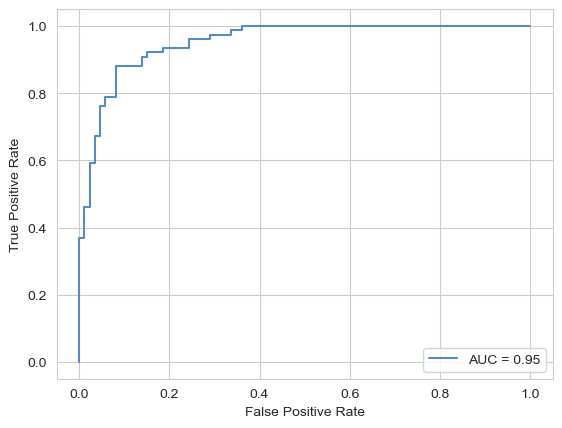

In [ ]:
all_work(gb_model,X,y)

## Normal model

In [ ]:
gb_model1=GradientBoostingClassifier()

In [ ]:
gb_model1.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
gb_pred1=gb_model1.predict(X_test)

In [ ]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_test,gb_pred1))
print("classification report: \n", classification_report(y_test,gb_pred1))


metrics on test data 

confusion matrix: 
 [[65 21]
 [16 60]]
classification report: 
               precision    recall  f1-score   support

           0       0.80      0.76      0.78        86
           1       0.74      0.79      0.76        76

    accuracy                           0.77       162
   macro avg       0.77      0.77      0.77       162
weighted avg       0.77      0.77      0.77       162



# XGB CLASSIFIER

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_model=XGBClassifier()

the accuracies of kfold are :
 [0.65789474 0.69911504 0.63716814 0.60176991 0.7699115 ]
None


stratified mean accuracy are :
 [0.6578947368421053, 0.6991150442477876, 0.6371681415929203, 0.6017699115044248, 0.7699115044247787]
None
Best Threshold=0.903304, G-Mean=0.970
enter the best thrshold value: 0.903304
metrics on test data 

confusion matrix: 
 [[82  4]
 [ 2 74]]
classification report: 
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        86
           1       0.95      0.97      0.96        76

    accuracy                           0.96       162
   macro avg       0.96      0.96      0.96       162
weighted avg       0.96      0.96      0.96       162



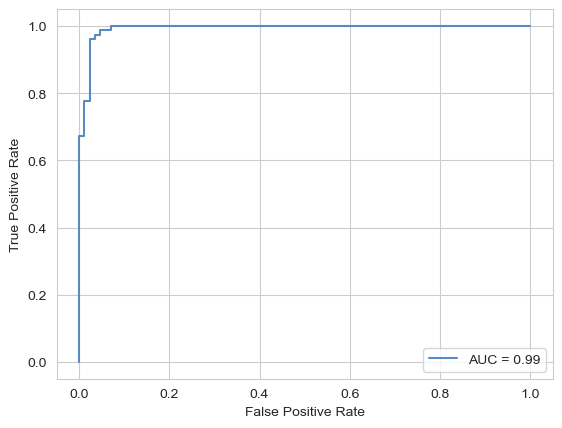

In [ ]:
all_work(xgb_model,X,y)

## Normal model

In [ ]:
xgb_model1=XGBClassifier()

In [ ]:
xgb_model1.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
xgb_pred1=xgb_model1.predict(X_test)

In [ ]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_test,xgb_pred1))
print("classification report: \n", classification_report(y_test,xgb_pred1))


metrics on test data 

confusion matrix: 
 [[69 17]
 [14 62]]
classification report: 
               precision    recall  f1-score   support

           0       0.83      0.80      0.82        86
           1       0.78      0.82      0.80        76

    accuracy                           0.81       162
   macro avg       0.81      0.81      0.81       162
weighted avg       0.81      0.81      0.81       162



# Bagging clasifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bag_model=BaggingClassifier(estimator=rf_model)

the accuracies of kfold are :
 [0.70175439 0.72566372 0.72566372 0.61061947 0.74336283]
None


stratified mean accuracy are :
 [0.7017543859649122, 0.7433628318584071, 0.7256637168141593, 0.6548672566371682, 0.7433628318584071]
None
Best Threshold=0.657000, G-Mean=0.939
enter the best thrshold value: 0.657
metrics on test data 

confusion matrix: 
 [[79  7]
 [ 4 72]]
classification report: 
               precision    recall  f1-score   support

           0       0.95      0.92      0.93        86
           1       0.91      0.95      0.93        76

    accuracy                           0.93       162
   macro avg       0.93      0.93      0.93       162
weighted avg       0.93      0.93      0.93       162



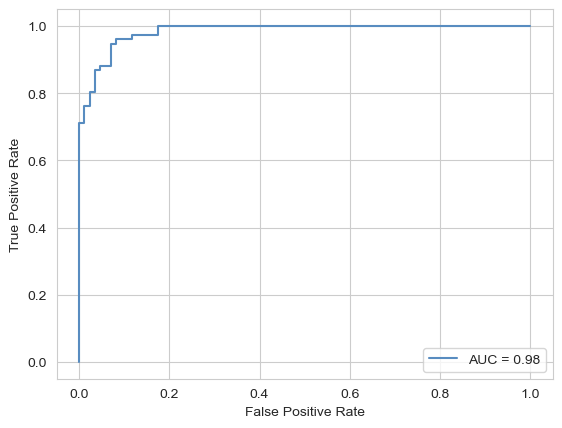

In [ ]:
all_work(bag_model,X,y)

## Normal model

In [ ]:
bag_model1=BaggingClassifier(estimator=sv_model1)

In [ ]:
bag_model1.fit(X_train,y_train)

BaggingClassifier(estimator=SVC(C=100, gamma=0.6))

In [ ]:
bag_pred1=bag_model1.predict(X_test)

In [ ]:
print("metrics on test data \n")

print("confusion matrix: \n", confusion_matrix(y_test,bag_pred1))
print("classification report: \n", classification_report(y_test,bag_pred1))


metrics on test data 

confusion matrix: 
 [[75 11]
 [11 65]]
classification report: 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        86
           1       0.86      0.86      0.86        76

    accuracy                           0.86       162
   macro avg       0.86      0.86      0.86       162
weighted avg       0.86      0.86      0.86       162



In [ ]:

models=[log_model,knn_model,svc_model,dt_model,rf_model,gb_model,xgb_model,bag_model]

<Figure size 800x600 with 0 Axes>

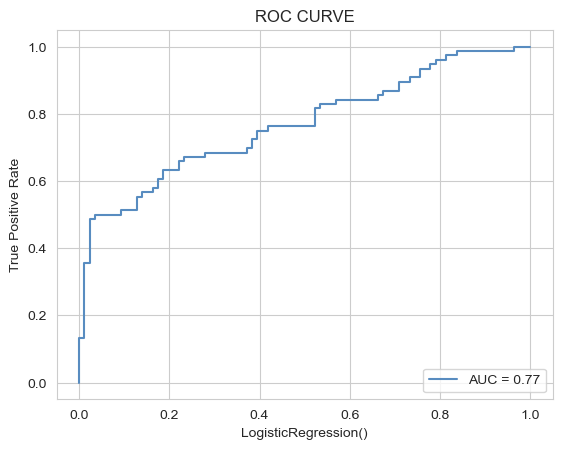

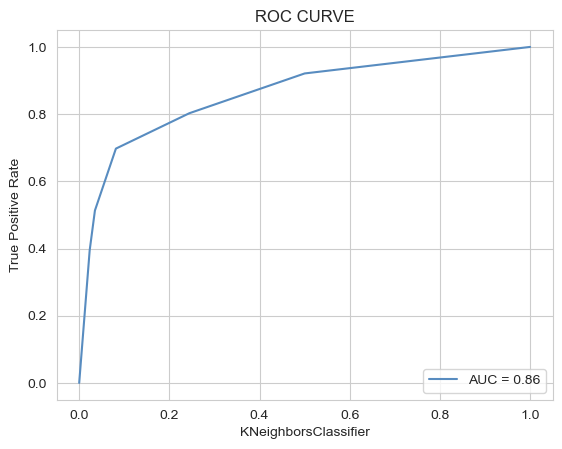

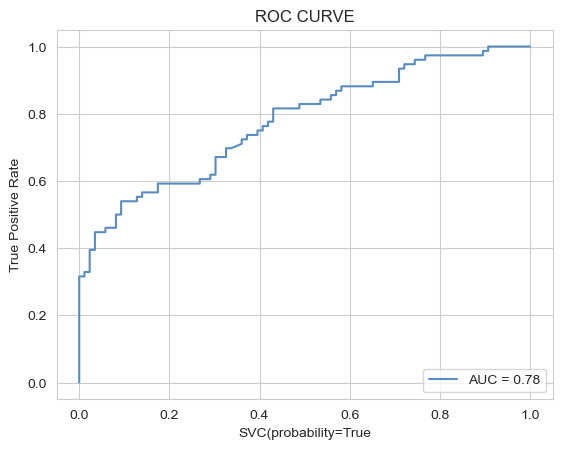

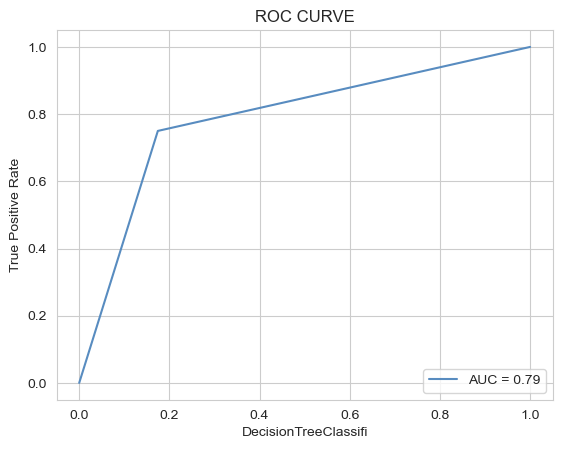

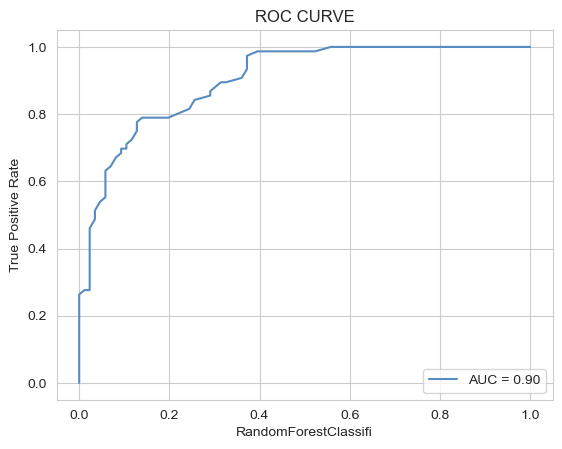

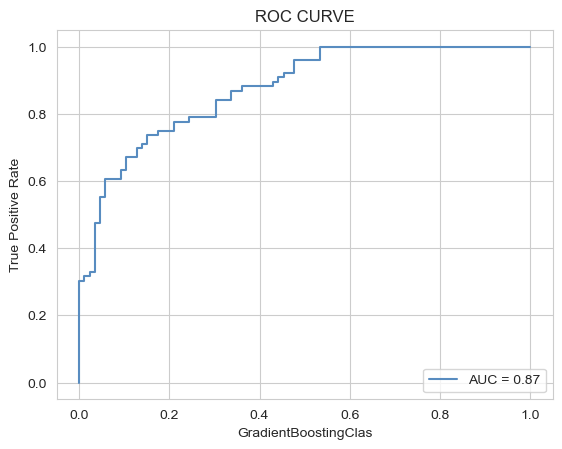

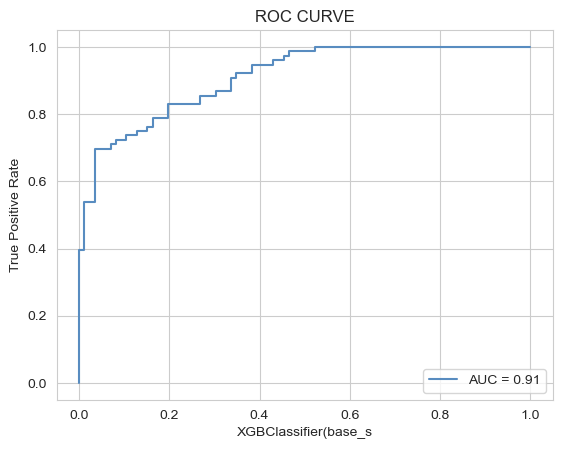

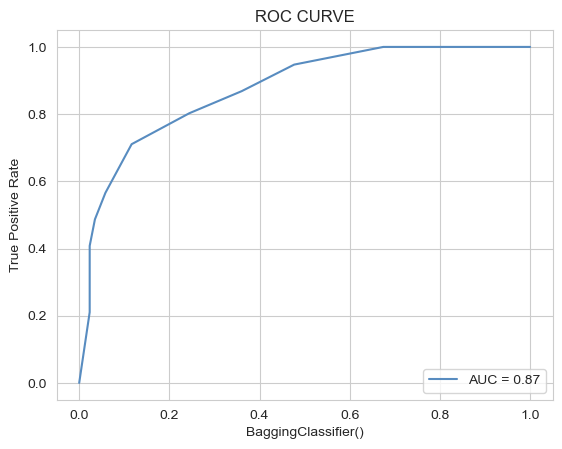

In [ ]:

plt.figure(figsize=(8,6))

for i in models:

    log=i.predict_proba(X_test)
    fpr,tpr,threshold=roc_curve(y_test,log[:,-1])
    auc_score=auc(fpr,tpr)
    RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=auc_score).plot()
    plt.xlabel(str(i)[:20])
    plt.title('ROC CURVE')


### Task 1:-Prepare a complete data analysis report on the given data

        1. univariant ,bivariant and mutvariant analysis is done for the given data

## Task 2:-Create a predictive model with implementation of different classifiers on liver patient diseases dataset to predict liver diseases.

            1.after data preporcessing the data was tested under different machine learning models

            2.normal approcach and the optimization techniques were not giving better accuracy on the given data.
                except svc model which gave 86 % accuracy after optimization with better segragation between FN,FP

            3. threshold setting has given the better result above 95% accuracy with very few FP,FN
                 there are 3 models which giving more than 90% of accuracy which are
                 **RANDOM FOREST**, **XGB** AND **GRADIANTBOOSTING**

                 out of these RANDOM FOREST PERFORMING VERY WELL compared to these 2


### Task3:- Create an analysis to show on what basis you have designed your model.

main focus was to reduce the number of `false postive` and `false negative` values in the classification process

            1.analysis is done on  tpr,fpr and threshold values and segregated the balacned threshold value to get
               balanced  FP and FN.

